In [9]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

--------------Q1----------------

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    print(f"\n===== Kernel: {kernel.upper()} =====")
    model = SVC(kernel=kernel, degree=3 if kernel == 'poly' else 0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")


===== Kernel: LINEAR =====

===== Kernel: POLY =====

===== Kernel: RBF =====
Accuracy: 0.9667
Precision: 0.9697
Recall: 0.9667
F1-Score: 0.9666


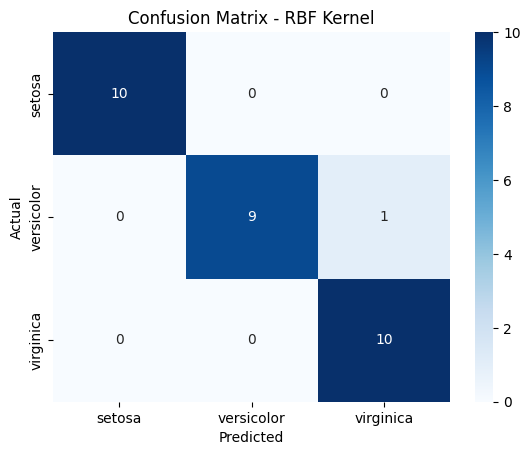

In [8]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title(f"Confusion Matrix - {kernel.upper()} Kernel")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

------------------Q2------------------

In [10]:
data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# without scaling
svm_no_scale = SVC(kernel='rbf')
svm_no_scale.fit(X_train, y_train)
train_acc_no = svm_no_scale.score(X_train, y_train)
test_acc_no = svm_no_scale.score(X_test, y_test)

In [13]:
# model with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
svm_scaled = SVC(kernel='rbf')
svm_scaled.fit(X_train_scaled, y_train)
train_acc_scaled = svm_scaled.score(X_train_scaled, y_train)
test_acc_scaled = svm_scaled.score(X_test_scaled, y_test)

print("\n--- Without Feature Scaling ---")
print("Training Accuracy:", round(train_acc_no, 4))
print("Testing Accuracy:", round(test_acc_no, 4))

print("\n--- With Feature Scaling ---")
print("Training Accuracy:", round(train_acc_scaled, 4))
print("Testing Accuracy:", round(test_acc_scaled, 4))


--- Without Feature Scaling ---
Training Accuracy: 0.9187
Testing Accuracy: 0.9298

--- With Feature Scaling ---
Training Accuracy: 0.9824
Testing Accuracy: 0.9825
